In [45]:
import torch
import numpy as np

## Normalization Example for Linear Regression

In [46]:
x = torch.tensor([ 1.,  2.,  3.,  4.,  5.]) #rooms
y = torch.tensor([11., 21., 31., 41., 51.]) #price

In [47]:
x_mean = x.mean()
x_mean

tensor(3.)

In [48]:
x_std = x.std()
x_std

tensor(1.5811)

In [49]:
x_n = (x - x_mean)/x_std

In [50]:
y_mean = y.mean()
y_std = y.std()


In [51]:
x_n = (x - x_mean)/ x_std
y_n = (y - y_mean)/ y_std

In [52]:
k = torch.tensor([.01], requires_grad=True)
b = torch.tensor([.01], requires_grad=True)

print(k, type(k), k.requires_grad)
print(b, type(b), b.requires_grad)

tensor(1.00000e-03 *
       [10.0000]) <class 'torch.Tensor'> True
tensor(1.00000e-03 *
       [10.0000]) <class 'torch.Tensor'> True


In [53]:
y_n_ = k * x_n + b

In [54]:
y_n_

tensor(1.00000e-02 *
       [-0.2649,  0.3675,  1.0000,  1.6325,  2.2649])

In [55]:
y_n

tensor([-1.2649, -0.6325,  0.0000,  0.6325,  1.2649])

In [56]:
learning_rate = 0.01
optimizer = torch.optim.SGD([k, b], lr=learning_rate)

print(optimizer, type(optimizer))

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.01
    momentum: 0
    nesterov: False
    weight_decay: 0
) <class 'torch.optim.sgd.SGD'>


In [57]:
# Learning Loop 
for _ in range(2001):

    y_n_ = k * x_n + b

    loss_vector = (y_n - y_n_)**2
    loss = loss_vector.mean()

    optimizer.zero_grad() # clean all grad    
    loss.backward() # ~backprob~ step
    
    optimizer.step()
    
    if _ % 1000 == 0:
        print('step = ', _)
        print('step_loss = ', loss_vector, loss)
        print('step_k_grad = ', k.grad)
        print('step_b_grad = ', b.grad)
        print('step_y_n_ = ', y_n_)
        print('step_y_ = ', y_n_ * y_std + y_mean)
        print('step_k = ', k)
        print('step_b = ', b)
        print('____________')

step =  0
step_loss =  tensor([ 1.5933e+00,  4.0466e-01,  1.0000e-04,  3.7962e-01,  1.5432e+00]) tensor(0.7842)
step_k_grad =  tensor([-1.5840])
step_b_grad =  tensor(1.00000e-02 *
       [ 2.0000])
step_y_n_ =  tensor(1.00000e-02 *
       [-0.2649,  0.3675,  1.0000,  1.6325,  2.2649])
step_y_ =  tensor([ 30.9581,  31.0581,  31.1581,  31.2581,  31.3581])
step_k =  tensor(1.00000e-02 *
       [ 2.5840])
step_b =  tensor(1.00000e-03 *
       [ 9.8000])
____________
step =  1000
step_loss =  tensor([ 5.1301e-12,  1.2825e-12,  4.7142e-17,  1.2825e-12,  5.1301e-12]) tensor(1.00000e-12 *
       2.5651)
step_k_grad =  tensor(1.00000e-06 *
       [-2.8650])
step_b_grad =  tensor(1.00000e-09 *
       [ 2.7464])
step_y_n_ =  tensor([-1.2649e+00, -6.3245e-01,  6.8660e-09,  6.3245e-01,  1.2649e+00])
step_y_ =  tensor([ 11.0000,  21.0000,  31.0000,  41.0000,  51.0000])
step_k =  tensor([ 1.0000])
step_b =  tensor(1.00000e-09 *
       [ 6.8386])
____________
step =  2000
step_loss =  tensor([ 5.1301

In [67]:
import matplotlib.pyplot as plt
import numpy as np

""" this function just plotting
    your data and linear model """
def plot_result(X, Y, lin_model=None, extra_point=None):
    plt.xlabel('rooms, number')
    plt.ylabel('price, $1000')
    plt.plot(X,Y, 'bo') # 'bo' - means 'b'-blue 'o'-dots, you can use 'ro' or 'gx' ('x' for cross)
    if lin_model:
        b = lin_model[0]
        w = lin_model[1]
        t = np.arange(X.min(), X.max(), 0.01)
        plt.plot(t, w*t+b , 'k')
    if extra_point:
        plt.plot(extra_point[0], extra_point[1], 'ro')
    plt.show()

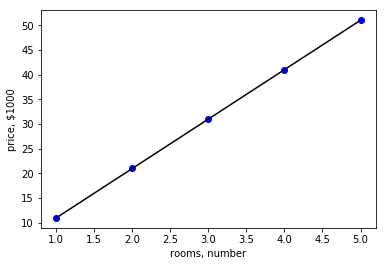

In [68]:
plot_result(np.array(x), np.array(y), [1,10])

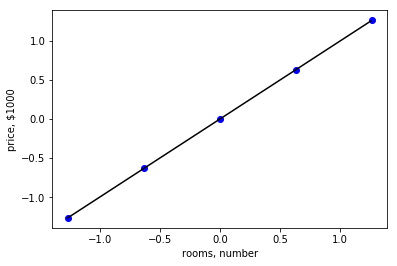

In [69]:
plot_result(np.array(x_n), np.array(y_n), [0,1])

In [70]:
x_test = 3.5

In [71]:
x_test_n = (x_test - x_mean) / x_std
x_test_n

tensor(0.3162)

In [72]:
y_n_ = k*x_test_n + b

In [73]:
y_n_

tensor([ 0.3162])

In [74]:
y_ = y_n_*y_std + y_mean

In [75]:
y_

tensor([ 36.0000])